# From *Adobo* to *Abundance*: Predicting Filipino Family Annual Income Using the k-Nearest Neighbor (kNN) Regression Algorithm

**BY:** <br> 
Baguio, Christian Jay <br>
Bandivas, Roxanne Mae <br>
Barrio, Reyjane Mae <br>
Palmes, Jhibsam <br>
Sabacajan, Cle Michael <br>
Tapao, Mark Vincent

**Course:** Machine Learning <br/>
**Program & Section:** BS in Data Science - DS3A

## **💵Introduction**

 <br>

In the Philippines, understanding the economic landscape of Filipino families is crucial for policymakers, economists, and social workers alike. The Family Income and Expenditure Survey (FIES), conducted by the Philippine Statistics Authority (PSA), serves as a vital tool in capturing the financial realities of households across the nation. With its extensive data on income, expenditure, and consumption patterns, the FIES serves as a rich resource for understanding the financial dynamics within households across the country.

Using the data from the 2017 FIES survey, our aim is to develop a predictive model that can estimate the annual income of Filipino families based on selected variables. With a dataset encompassing over 40,000 observations and 60 variables, including household income and expenditures, we have a rich source of information to draw upon.

By applying the kNN regression algorithm, we seek to uncover patterns and relationships within the data that can help predict family incomes more accurately. This predictive model holds the potential to assist policymakers in targeting social welfare programs, economists in understanding income distribution dynamics, and social workers in identifying vulnerable households in need of assistance.

In essence, our project bridges the gap between data and actionable insights, empowering stakeholders to make informed decisions that positively impact Filipino families across the nation. Through the lens of data science, we aim to contribute to a better understanding of the economic realities faced by Filipino households, ultimately striving for a more equitable and prosperous society for all.

## **💵Data Discussion**

<br>

**Context** <br>
The Philippine Statistics Authority (PSA) spearheads the conduct of the Family Income and Expenditure Survey (FIES) nationwide. The survey, which is undertaken every three (3) years, is aimed at providing data on family income and expenditure, including, among others, levels of consumption by item of expenditure, sources of income in cash, and related information affecting income and expenditure levels and patterns in the Philippines.

**Content** <br>
Inside this data set is some selected variables from the latest Family Income and Expenditure Survey (FIES) in the Philippines. It contains more than `40k observations and 60 variables` which is primarily comprised of the household income and expenditures of that specific household.

**Acknowledgements** <br>
The Philippine Statistics Authority for providing the publisher with their raw data.

<br>


**Citation** 

Francis Paul Flores. (2017). Filipino Family Income and Expenditure. (<a href="https://www.kaggle.com/datasets/grosvenpaul/family-income-and-expenditure/data">Kaggle.com</a>) 

## **💵Problem**

### 🔃 Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore")

### 📩 Load Dataset

In [2]:
df = pd.read_csv('income.csv')
df.head().T

,0,1,2,3,4
Total Household Income,480332,198235,82785,107589,189322
Region,CAR,CAR,CAR,CAR,CAR
Total Food Expenditure,117848,67766,61609,78189,94625
Main Source of Income,Wage/Salaries,Wage/Salaries,Wage/Salaries,Wage/Salaries,Wage/Salaries
Agricultural Household indicator,0,0,1,0,0
Bread and Cereals Expenditure,42140,17329,34182,34030,34820
Total Rice Expenditure,38300,13008,32001,28659,30167
Meat Expenditure,24676,17434,7783,10914,18391
Total Fish and marine products Expenditure,16806,11073,2590,10812,11309
Fruit Expenditure,3325,2035,1730,690,1395


### **🔎 Examine Dataset (EDA)**

In [3]:
df.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

In [4]:
df['Income per Family Member'] = df['Total Household Income']/df['Total Number of Family members']
df['Money Saved'] = df['Total Household Income'] - df.loc[:, ['Total Food Expenditure',
         'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
         'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
         'Housing and water Expenditure', 'Communication Expenditure', 
         'Medical Care Expenditure', 'Transportation Expenditure', 'Education Expenditure',
         'Miscellaneous Goods and Services Expenditure','Special Occasions Expenditure',
         'Crop Farming and Gardening expenses']].sum(axis = 1)
df['Total Offspring'] = df['Members with age less than 5 year old'] + df['Members with age 5 - 17 years old']
df.drop(columns = ['Members with age less than 5 year old','Members with age 5 - 17 years old'], inplace = True)

In [5]:
df['Electricity'].replace({1:'Yes', 0:'No'}, inplace = True)

df['Total Offspring'].replace({0:"Zero",1:"One",2:"Two",3:"Three",4:"Four"}, inplace = True)
df['Total Offspring'].replace({k:"More than four" for k in list(range(5,14))}, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 61 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Total Household Income                         41544 non-null  int64  
 1   Region                                         41544 non-null  object 
 2   Total Food Expenditure                         41544 non-null  int64  
 3   Main Source of Income                          41544 non-null  object 
 4   Agricultural Household indicator               41544 non-null  int64  
 5   Bread and Cereals Expenditure                  41544 non-null  int64  
 6   Total Rice Expenditure                         41544 non-null  int64  
 7   Meat Expenditure                               41544 non-null  int64  
 8   Total Fish and  marine products Expenditure    41544 non-null  int64  
 9   Fruit Expenditure                              415

In [7]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Total Household Income,41544.0,247555.58,286880.52,11285.00,104895.00,164079.50,291138.50,11815988.0
Total Food Expenditure,41544.0,85099.16,51637.95,2947.00,51017.25,72985.50,105635.50,827565.0
Agricultural Household indicator,41544.0,0.43,0.68,0.00,0.00,0.00,1.00,2.0
Bread and Cereals Expenditure,41544.0,25133.72,13466.48,0.00,16556.00,23324.00,31439.00,765864.0
Total Rice Expenditure,41544.0,18195.83,11727.22,0.00,11020.00,16620.00,23920.00,758326.0
Meat Expenditure,41544.0,10540.07,10497.73,0.00,3353.75,7332.50,14292.00,261566.0
Total Fish and marine products Expenditure,41544.0,10529.32,7812.20,0.00,5504.00,8695.00,13388.00,188208.0
Fruit Expenditure,41544.0,2550.47,2969.75,0.00,1024.75,1820.00,3100.00,273769.0
Vegetables Expenditure,41544.0,5006.92,3300.18,0.00,2873.00,4314.00,6304.25,74800.0
Restaurant and hotels Expenditure,41544.0,15436.57,23705.20,0.00,1930.00,7314.00,19921.25,725296.0


In [8]:
df_categorical = df.select_dtypes(include='object')

In [9]:
numeric = df.drop(columns=df_categorical)

In [10]:
lof = LocalOutlierFactor()
lof.fit(numeric)
outlier_labels = lof.fit_predict(numeric)
outliers = numeric[outlier_labels == -1]
outliers

  File "C:\Users\jhibs\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Income per Family Member,Money Saved
172,134410,96729,0,20545,16495,59736,4680,1215,3285,0,...,0,0,0,1,0,0,0,1,67205.000000,-22679
212,269702,27529,0,8125,6220,5643,3415,825,6335,0,...,0,0,0,1,0,0,0,0,134851.000000,50320
460,1538900,525265,0,64174,38088,119230,76356,26710,25792,102700,...,4,4,3,9,1,1,0,0,170988.888889,-20909
463,221760,98005,0,45448,39520,6464,15922,3035,9010,2380,...,0,0,0,7,0,0,0,0,31680.000000,-48997
467,322000,130348,0,46282,28600,19386,14668,3925,5650,10900,...,0,0,0,2,0,1,0,1,80500.000000,-70504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41055,514690,191631,2,2730,0,0,0,4100,0,181000,...,0,0,0,1,1,0,0,1,171563.333333,26151
41179,202370,64673,2,30355,26676,6198,5418,1660,4523,1810,...,0,0,0,3,0,0,0,0,50592.500000,31495
41291,355092,36264,2,8843,7193,5460,4847,7520,2063,0,...,0,0,0,1,0,1,0,1,355092.000000,167746
41341,153345,98263,2,68586,15080,5562,7348,2100,4173,0,...,0,0,0,1,0,0,0,1,51115.000000,22738


In [11]:
q1 = numeric.quantile(0.25)
q3 = numeric. quantile(0.75)
iqr = q3 - q1
iqr

Total Household Income                           186243.500000
Total Food Expenditure                            54618.250000
Agricultural Household indicator                      1.000000
Bread and Cereals Expenditure                     14883.000000
Total Rice Expenditure                            12900.000000
Meat Expenditure                                  10938.250000
Total Fish and  marine products Expenditure        7884.000000
Fruit Expenditure                                  2075.250000
Vegetables Expenditure                             3431.250000
Restaurant and hotels Expenditure                 17991.250000
Alcoholic Beverages Expenditure                    1299.250000
Tobacco Expenditure                                3146.500000
Clothing, Footwear and Other Wear Expenditure      4215.000000
Housing and water Expenditure                     32868.000000
Imputed House Rental Value                        18000.000000
Medical Care Expenditure                           4380

In [12]:
whisker = 1.5
lower = q1 - (whisker * iqr)
upper = q3 + (whisker * iqr)
print(upper)
print(lower)

Total Household Income                           570503.750000
Total Food Expenditure                           187562.875000
Agricultural Household indicator                      2.500000
Bread and Cereals Expenditure                     53763.500000
Total Rice Expenditure                            43270.000000
Meat Expenditure                                  30699.375000
Total Fish and  marine products Expenditure       25214.000000
Fruit Expenditure                                  6212.875000
Vegetables Expenditure                            11451.125000
Restaurant and hotels Expenditure                 46908.125000
Alcoholic Beverages Expenditure                    3248.125000
Tobacco Expenditure                                7866.250000
Clothing, Footwear and Other Wear Expenditure     11902.500000
Housing and water Expenditure                     95250.000000
Imputed House Rental Value                        51000.000000
Medical Care Expenditure                          11250

In [13]:
df_numeric = np.where(numeric > upper, upper,
              np.where(numeric < lower, lower, numeric))

In [14]:
columns = list(numeric.columns)
df_numeric = pd.DataFrame(df_numeric)
df_numeric.columns = columns
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Household Income,41544.0,218754.553516,153574.792495,11285.000000,104895.000000,164079.500,291138.500000,570503.750000
Total Food Expenditure,41544.0,82675.068190,42930.640371,2947.000000,51017.250000,72985.500,105635.500000,187562.875000
Agricultural Household indicator,41544.0,0.429858,0.676666,0.000000,0.000000,0.000,1.000000,2.000000
Bread and Cereals Expenditure,41544.0,24768.200101,11240.327588,0.000000,16556.000000,23324.000,31439.000000,53763.500000
Total Rice Expenditure,41544.0,17921.136939,9846.989166,0.000000,11020.000000,16620.000,23920.000000,43270.000000
Meat Expenditure,41544.0,9972.447273,8459.830787,0.000000,3353.750000,7332.500,14292.000000,30699.375000
Total Fish and marine products Expenditure,41544.0,10097.548142,6143.459361,0.000000,5504.000000,8695.000,13388.000000,25214.000000
Fruit Expenditure,41544.0,2298.120303,1679.513512,0.000000,1024.750000,1820.000,3100.000000,6212.875000
Vegetables Expenditure,41544.0,4843.339002,2688.384649,0.000000,2873.000000,4314.000,6304.250000,11451.125000
Restaurant and hotels Expenditure,41544.0,13177.724765,14463.197536,0.000000,1930.000000,7314.000,19921.250000,46908.125000


## **💡 Highlights of the Results**

**3 highlights after implementing kNN algorithm:**
1. The optimal **n_neighbors** of Model 1(using all features) is **`5`**, & for Model 2(using top features) is **`7`**.
2. The $R^2$ of Model 1 is **`0.96`** w/ **`10563.87`** **RMSE**, while the $R^2$ of Model 2 is **`0.98`** w/ **`8233.24`** **RMSE**.
3. The features that affect the target most are **Food**, **Services**, and **Housing & Water Expenditures**.

## **🤖 kNN Implementation**

In [15]:
df_numeric.rename(columns={'Total Household Income': 'TotalHouseholdIncome'}, inplace=True)

In [74]:
X = df_numeric.drop('TotalHouseholdIncome', axis = 1)
y = df_numeric['TotalHouseholdIncome']

In [81]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=42)

training_score = []
test_score = []

neighbors_settings = range(1, 21)

for n_neighbors in neighbors_settings:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    training_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

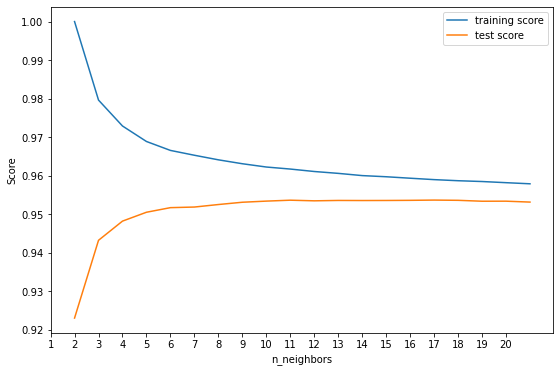

Best Score for kNN: 0.9536442942724126
Best parameter for n_neighbor: 16


In [80]:
plt.figure(figsize = (9,6))    
plt.plot(neighbors_settings, training_score, label="training score")
plt.plot(neighbors_settings, test_score, label="test score")
plt.xticks(ticks=range(len(neighbors_settings)), labels=list(neighbors_settings))
plt.ylabel("Score")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

print(f"Best Score for kNN: {np.max(test_score)}")
print(f"Best parameter for n_neighbor: {np.argmax(test_score)+1}")

### **📝 Evaluate Model Performance**

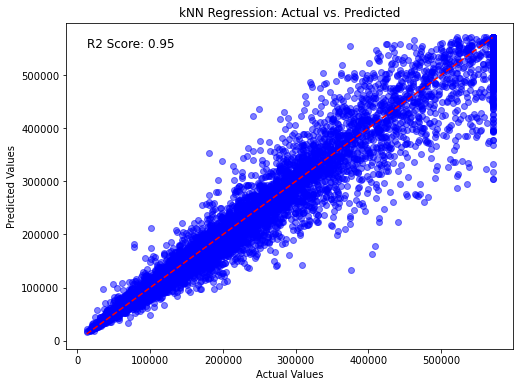

In [19]:
reg = KNeighborsRegressor(n_neighbors=15)
reg.fit(X_train, y_train) 

y_pred = reg.predict(X_test)

r2 = r2_score(y_test, y_pred)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('kNN Regression: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.text(min(y_test), max(y_pred), f'R2 Score: {r2:.2f}', fontsize=12, verticalalignment='top')
plt.show()

In [20]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 1087072575.64
Root Mean Squared Error (RMSE): 32970.78
R-squared (R2): 0.95


*Cross Validation*

In [ ]:
num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

mse_values = []

X = np.array(X)
y = np.array(y)

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    
    knn = KNeighborsRegressor(n_neighbors=5) 
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    mse_values.append(mse)

average_mse = np.mean(mse_values)
print("Average MSE:", average_mse)

*Top Features*

In [37]:
correlation_matrix = df_numeric.corr()
target_correlation = correlation_matrix['TotalHouseholdIncome'].sort_values(ascending=False)
target_correlation

TotalHouseholdIncome                             1.000000
Miscellaneous Goods and Services Expenditure     0.813747
Housing and water Expenditure                    0.793880
Total Food Expenditure                           0.788397
Communication Expenditure                        0.784720
Income per Family Member                         0.763420
Transportation Expenditure                       0.722558
Meat Expenditure                                 0.705660
Clothing, Footwear and Other Wear Expenditure    0.690009
Imputed House Rental Value                       0.659472
Number of Cellular phone                         0.630558
Restaurant and hotels Expenditure                0.626971
Money Saved                                      0.604650
Number of Refrigerator/Freezer                   0.598194
Number of Washing Machine                        0.582692
Fruit Expenditure                                0.577231
Number of Television                             0.545333
Special Occasi

In [21]:
print('Features with their corresponding correlation values to the target variable:\n\nFeature\t                                       Correlation')
print('-'*57)
print(df_numeric.corr().TotalHouseholdIncome[df_numeric.corr()[df_numeric.columns[-1]].abs().index.tolist()
                             [1:]].sort_values(ascending=False))

Features with their corresponding correlation values to the target variable:

Feature	                                       Correlation
---------------------------------------------------------
Miscellaneous Goods and Services Expenditure     0.813747
Housing and water Expenditure                    0.793880
Total Food Expenditure                           0.788397
Communication Expenditure                        0.784720
Income per Family Member                         0.763420
Transportation Expenditure                       0.722558
Meat Expenditure                                 0.705660
Clothing, Footwear and Other Wear Expenditure    0.690009
Imputed House Rental Value                       0.659472
Number of Cellular phone                         0.630558
Restaurant and hotels Expenditure                0.626971
Money Saved                                      0.604650
Number of Refrigerator/Freezer                   0.598194
Number of Washing Machine                        0.

The provided evaluation metrics suggest that the model explains a significant portion of the variance in the dependent variable, as indicated by the high R-squared value of 0.96. However, the relatively large Mean Squared Error (MSE) of 118879488.31 signifies a considerable average squared difference between the actual and predicted values, suggesting room for improvement in prediction accuracy. Nonetheless, the Root Mean Squared Error (RMSE) of 10903.19 implies that, on average, the magnitude of prediction errors is relatively low, despite the high MSE. In summary, while the model demonstrates strong explanatory power, there's potential for enhancing prediction accuracy.

## 📜**Discussion of Results**

In [60]:
print('Top 3 Features with their corresponding correlation values to the target variable:\n\nFeature\t                                       Correlation')
print('-'*57)

print(df_numeric.corr().TotalHouseholdIncome[df_numeric.corr()[df_numeric.columns[-1]].abs().index.tolist()
                             [1:]].sort_values(ascending=False).head(3))

Top 3 Features with their corresponding correlation values to the target variable:

Feature	                                       Correlation
---------------------------------------------------------
Miscellaneous Goods and Services Expenditure    0.813747
Housing and water Expenditure                   0.793880
Total Food Expenditure                          0.788397
Name: TotalHouseholdIncome, dtype: float64


Above, we have a table showing the top 3 attributes that is highly correlated to the target. Let us examine the attributes one by one.

1. Total Food Expenditure: <br>
    > Food is a significant expenditure for households and higher income levels enable greater spending on food, potentially reflecting improved standards of living. Additionally, it indicates that food expenditure is a substantial portion of the household budget and serves as a vital indicator of household financial health and well-being.
<br>
2. Miscellaneous Goods and Services Expenditure: <br>
    > Higher-income households have more financial flexibility to afford discretionary expenses, reflecting a better quality of life, economic stability, and confidence.
<br>
3. Housing and water Expenditure: <br>
    > Households with higher incomes tend to allocate more resources towards housing and water, potentially reflecting a higher cost of living, regional economic dynamics, and priorities in maintaining a certain standard of living. It implies that these expenses may constitute a significant portion of the household budget, impacting overall financial behavior and lifestyle choices.
<br>

In [61]:
predicted = pd.DataFrame(y_pred, columns =['Predicted Values'])
predicted.describe().T

,count,mean,std,min,25%,50%,75%,max
Predicted Values,10386.0,214050.224315,149649.704704,17499.533333,103073.183333,159715.133333,282439.05,570503.75


In [62]:
actual = pd.DataFrame(y)
actual.describe().T

,count,mean,std,min,25%,50%,75%,max
TotalHouseholdIncome,41544.0,218754.553516,153574.792495,11285.0,104895.0,164079.5,291138.5,570503.75


### Additional Insights

Text(0.5, 1.0, 'Total Household Income per Region')

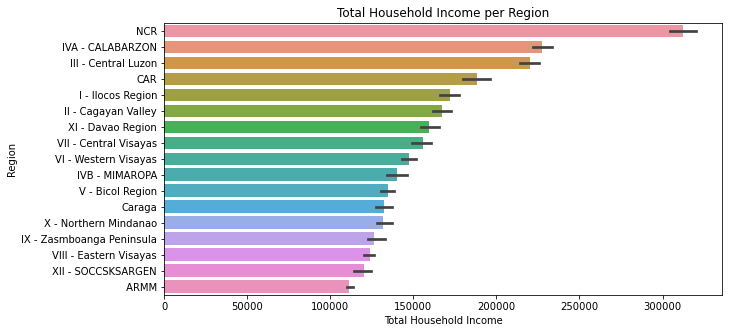

In [63]:
plt.figure(figsize = (10, 5))
order = df.groupby(by=["Region"])["Total Household Income"].median().iloc[::-1].sort_values(ascending=False).index
sns.barplot(x=df['Total Household Income'], y=df['Region'], estimator=np.median, order=order)
plt.title('Total Household Income per Region')

Text(0.5, 1.0, 'Total Household Income per Region')

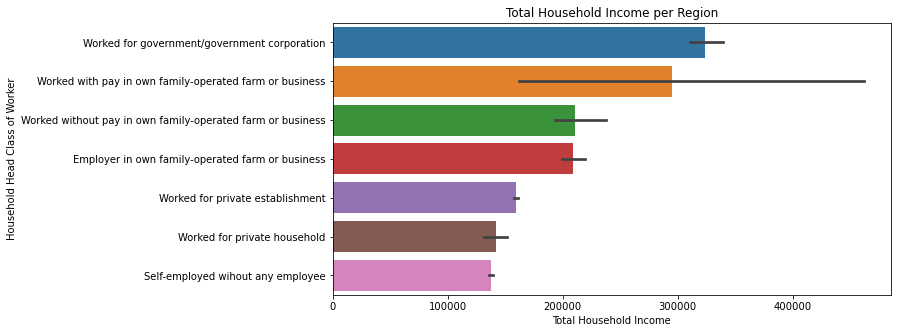

In [64]:
plt.figure(figsize = (10, 5))
order = df.groupby(by=["Household Head Class of Worker"])["Total Household Income"].median().iloc[::-1].sort_values(ascending=False).index
sns.barplot(x=df['Total Household Income'], y=df['Household Head Class of Worker'], estimator=np.median, order=order)
plt.title('Total Household Income per Region')

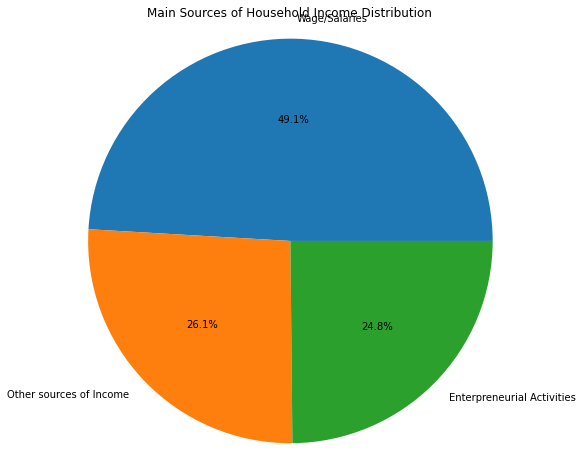

In [65]:
plot = df['Main Source of Income']
plt.figure(figsize=(8, 8))
plt.pie(plot.value_counts(), labels=plot.value_counts().index, autopct='%1.1f%%')
plt.title('Main Sources of Household Income Distribution')
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='TotalHouseholdIncome', ylabel='Household Head Marital Status'>

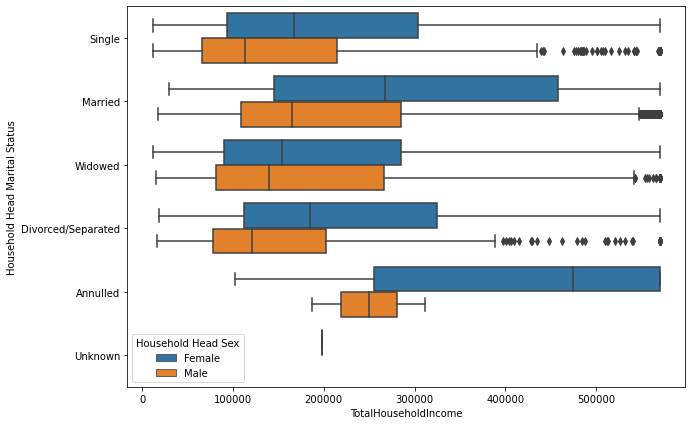

In [69]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = df_numeric['TotalHouseholdIncome'], y = df['Household Head Marital Status'], hue = df['Household Head Sex'])

<AxesSubplot:xlabel='TotalHouseholdIncome', ylabel='Household Head Sex'>

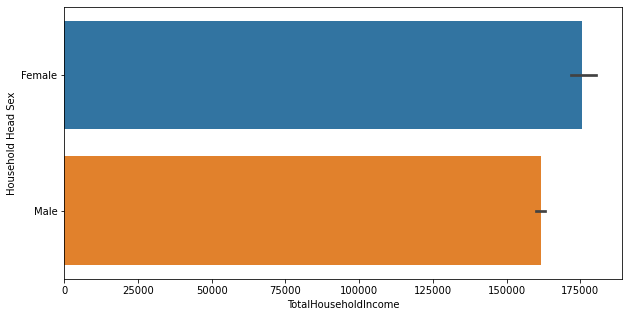

In [70]:
plt.figure(figsize = (10, 5))
sns.barplot(x=df_numeric['TotalHouseholdIncome'], y=df['Household Head Sex'], estimator=np.median)

<AxesSubplot:xlabel='TotalHouseholdIncome', ylabel='Main Source of Income'>

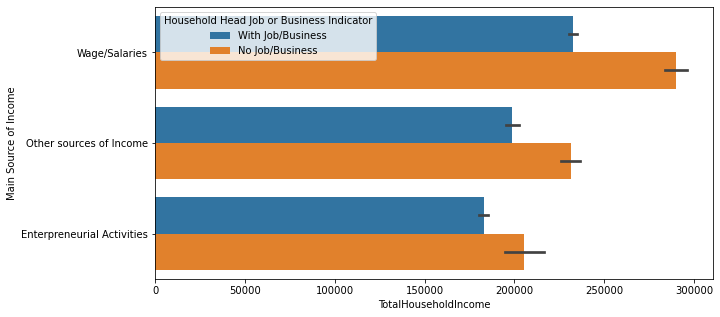

In [71]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df_numeric['TotalHouseholdIncome'], y=df_categorical['Main Source of Income'], 
            hue=df_categorical['Household Head Job or Business Indicator'])

<AxesSubplot:xlabel='TotalHouseholdIncome', ylabel='Total Offspring'>

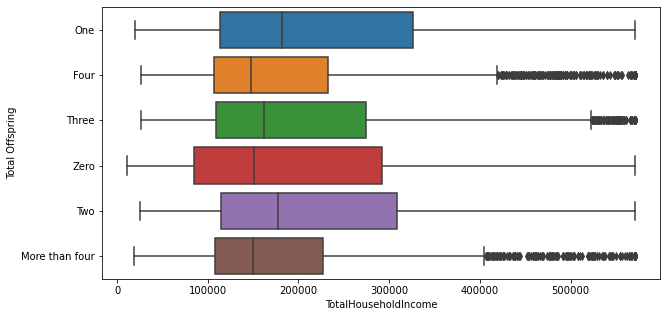

In [72]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_numeric['TotalHouseholdIncome'], y=df['Total Offspring'])